In [13]:
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt

In [14]:
raw_image = open('classroom.raw','rb').read()
raw_image = np.frombuffer(raw_image, np.uint8)
img = raw_image[0:712*1072]
img = np.reshape(img, (712,1072))

In [15]:
#new_img = np.zeros((712,1072),np.uint8)
new_img = np.zeros((832,1192),np.uint8)

In [16]:
k1=-0.3536
k2=0.1730
k3 = 0
max_p,max_q=0,0

In [17]:
for i in range(712):
    for j in range(1072):
        x = (j-536)/600
        y = (712 - i - 356)/600
        r = sqrt(x**2 + y**2)
        u = x*(1 + k1*(r**2) + k2*(r**4))
        v = y*(1 + k1*(r**2) + k2*(r**4))
        p = round(u*600 + 536)
        q = round(712-356-v*600)
        if(max_p<p):
            max_p = p
        if(max_q<q):
            max_q=q

In [18]:
for i in range(-50,782):
    for j in range(-50,1142):
        x = (j-536)/600
        y = (712 - i - 356)/600
        r = sqrt(x**2 + y**2)
        u = x*(1 + k1*(r**2) + k2*(r**4))
        v = y*(1 + k1*(r**2) + k2*(r**4))
        p = round(u*600 + 536)
        q = round(712-356-v*600)
        
        if(p>=1072 or p<=0 or q>=712 or q<=0):
            new_img[i+40][j+40] = 255
        else:
            new_img[i+40][j+40] = img[q][p]

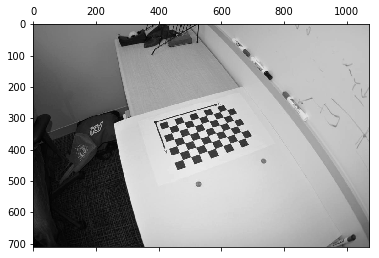

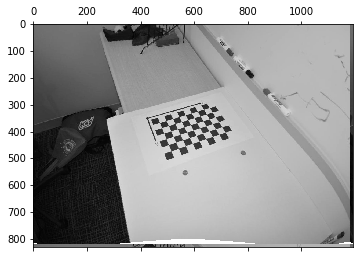

In [19]:
plt.matshow(img,cmap='gray')
plt.matshow(new_img,cmap='gray')
plt.show()